In [34]:
import os
import time

from tqdm import tqdm
import numpy as np
import wandb
import torch
from torch.cuda.amp import autocast
from torch.utils.data import DataLoader
from torchvision import transforms

from my_utils import data, models
from my_utils.utils import Hook
from my_utils.utils import load_model, get_conv_weights
from my_utils.vis import vis_4D, sim_matrix

# life save magic code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
print(f"torch version: {torch.__version__}")
use_cuda = torch.cuda.is_available()
if use_cuda:
    GPU_nums = torch.cuda.device_count()
    GPU = torch.cuda.get_device_properties(0)
    print(f"There are {GPU_nums} GPUs in total.\nThe first GPU is: {GPU}")
    if '3060' in GPU.name:
        print(f"CUDA version: {torch.cuda_version}")
    else:
        print(f"CUDA version: {torch.version.cuda}")
device = torch.device(f"cuda:3" if use_cuda else "cpu")
print(f"Using {device} now!")

torch version: 1.10.2+cu113
There are 8 GPUs in total.
The first GPU is: _CudaDeviceProperties(name='Tesla V100-SXM2-32GB', major=7, minor=0, total_memory=32510MB, multi_processor_count=80)
CUDA version: 11.3
Using cuda:3 now!


In [2]:
Dataset_DIR = '/home/wangyh/01-Projects/03-my/Datasets/polygons_unfilled_64_3'
T = transforms.Compose([
    transforms.ToTensor()
])
vis_data = data.MyDataset(os.path.join(Dataset_DIR, 'vis'), transform=T)
vis_loader = DataLoader(vis_data, batch_size=len(vis_data))

In [3]:
imgs, labels = next(iter(vis_loader))
print(imgs.shape)
print(labels)

torch.Size([8, 1, 64, 64])
tensor([0, 0, 1, 1, 2, 2, 3, 3])


In [3]:
model = load_model(run_name='2022_05_31_22_51_30').to(device)
conv_weights = get_conv_weights(model)
print(conv_weights[0].shape)

best val acc is: 0.9757500290870667
Successfully load model parameters!
(1, 2, 9, 9)


In [7]:
log_root = '/home/wangyh/01-Projects/03-my/test_logs'
run_name = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
run_dir = os.path.join(log_root, run_name)
os.makedirs(run_dir, exist_ok=True)
wandb.init(project='test_logs', entity="against-entropy", name=run_name, dir=run_dir)

In [9]:
wandb.finish()

In [42]:
conv_weights = get_conv_weights(model)
conv_weights[-1].transpose(1,0,2,3).shape

(8, 4, 9, 9)

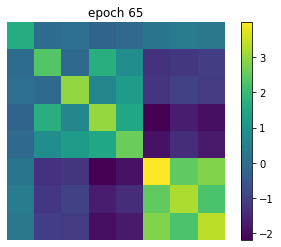

In [60]:
array = sim_matrix(data=conv_weights[-1].transpose(1,0,2,3), title='epoch 65', return_mode='fig_array')

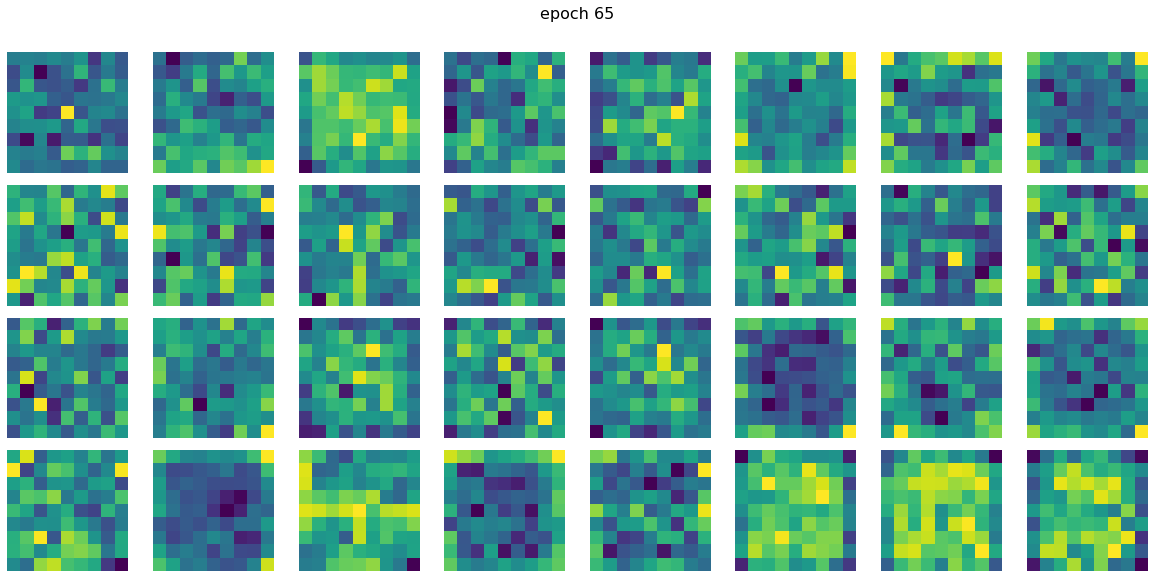

In [73]:
vis_4D(data=conv_weights[-1], title='epoch 65', return_mode=None)

In [56]:
array.shape

(288, 432, 4)